/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest F1-score: 0.9628760770286644
Logistic Regression F1-score: 0.8974513618636197


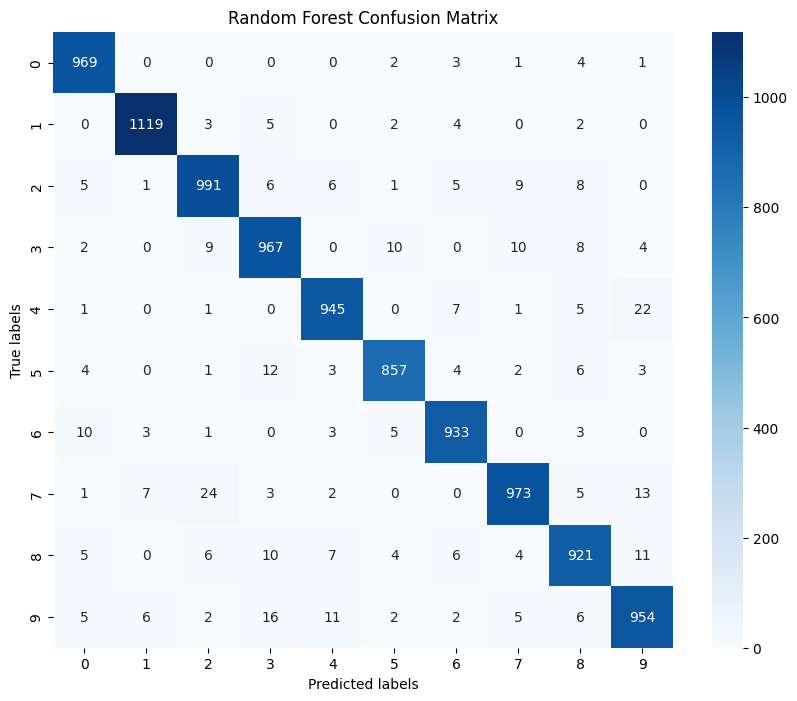

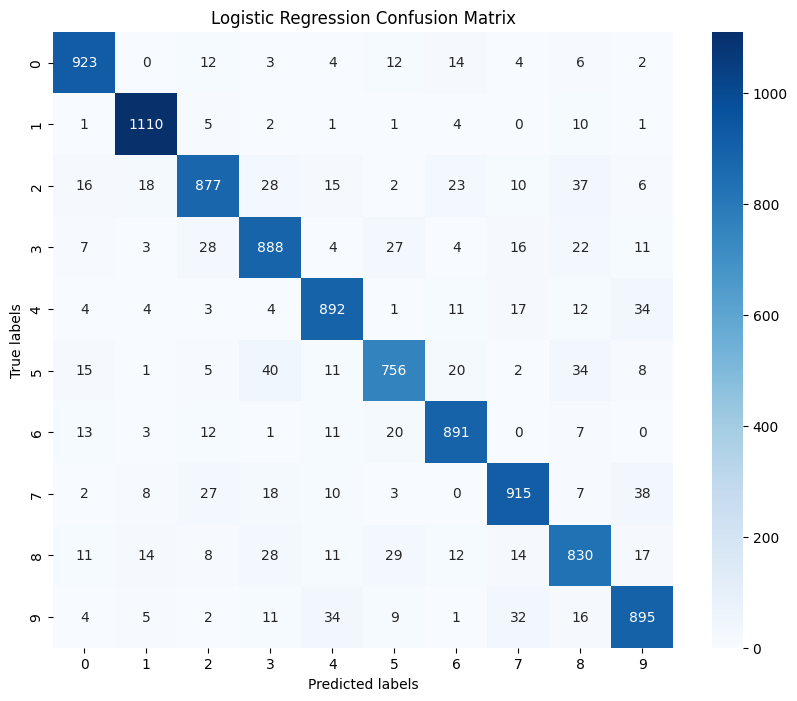

In [18]:
import numpy as np
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns  #data visualisation libray used in confusion matrix.
import matplotlib.pyplot as plt


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.5, stratify=y_train)
# Reshape the data into 1D arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_flat, y_train)

# Initialize and train the Logistic Regression classifier
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train_flat, y_train)

# Make predictions
rf_predictions = rf_clf.predict(X_test_flat)
lr_predictions = lr_clf.predict(X_test_flat)

# Calculate F1-score
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')
lr_f1_score = f1_score(y_test, lr_predictions, average='weighted')

# Calculate Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

print("Random Forest F1-score:", rf_f1_score)
print("Logistic Regression F1-score:", lr_f1_score)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Random Forest Confusion Matrix")
plt.show()



# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [19]:
# Identify commonly confused digits
confused_digits = []
for i in range(10):
    for j in range(10):
        if i != j and rf_conf_matrix[i, j] > 0:
            confused_digits.append((i, j, rf_conf_matrix[i, j]))

# Sort the confused digits by the frequency of confusion
confused_digits.sort(key=lambda x: x[2], reverse=True)

# Print the commonly confused digits
print("Commonly confused digits:")
for digit1, digit2, count in confused_digits:
    print(f"Digits {digit1} and {digit2}: Confusion count = {count}")


Commonly confused digits:
Digits 7 and 2: Confusion count = 24
Digits 4 and 9: Confusion count = 22
Digits 9 and 3: Confusion count = 16
Digits 7 and 9: Confusion count = 13
Digits 5 and 3: Confusion count = 12
Digits 8 and 9: Confusion count = 11
Digits 9 and 4: Confusion count = 11
Digits 3 and 5: Confusion count = 10
Digits 3 and 7: Confusion count = 10
Digits 6 and 0: Confusion count = 10
Digits 8 and 3: Confusion count = 10
Digits 2 and 7: Confusion count = 9
Digits 3 and 2: Confusion count = 9
Digits 2 and 8: Confusion count = 8
Digits 3 and 8: Confusion count = 8
Digits 4 and 6: Confusion count = 7
Digits 7 and 1: Confusion count = 7
Digits 8 and 4: Confusion count = 7
Digits 2 and 3: Confusion count = 6
Digits 2 and 4: Confusion count = 6
Digits 5 and 8: Confusion count = 6
Digits 8 and 2: Confusion count = 6
Digits 8 and 6: Confusion count = 6
Digits 9 and 1: Confusion count = 6
Digits 9 and 8: Confusion count = 6
Digits 1 and 3: Confusion count = 5
Digits 2 and 0: Confusion c

In [20]:
# Identify commonly confused digits
confused_digits = []
for i in range(10):
    for j in range(10):
        if i != j and lr_conf_matrix[i, j] > 0:
            confused_digits.append((i, j, lr_conf_matrix[i, j]))

# Sort the confused digits by the frequency of confusion
confused_digits.sort(key=lambda x: x[2], reverse=True)

# Print the commonly confused digits
print("Commonly confused digits:")
for digit1, digit2, count in confused_digits:
    print(f"Digits {digit1} and {digit2}: Confusion count = {count}")


Commonly confused digits:
Digits 5 and 3: Confusion count = 40
Digits 7 and 9: Confusion count = 38
Digits 2 and 8: Confusion count = 37
Digits 4 and 9: Confusion count = 34
Digits 5 and 8: Confusion count = 34
Digits 9 and 4: Confusion count = 34
Digits 9 and 7: Confusion count = 32
Digits 8 and 5: Confusion count = 29
Digits 2 and 3: Confusion count = 28
Digits 3 and 2: Confusion count = 28
Digits 8 and 3: Confusion count = 28
Digits 3 and 5: Confusion count = 27
Digits 7 and 2: Confusion count = 27
Digits 2 and 6: Confusion count = 23
Digits 3 and 8: Confusion count = 22
Digits 5 and 6: Confusion count = 20
Digits 6 and 5: Confusion count = 20
Digits 2 and 1: Confusion count = 18
Digits 7 and 3: Confusion count = 18
Digits 4 and 7: Confusion count = 17
Digits 8 and 9: Confusion count = 17
Digits 2 and 0: Confusion count = 16
Digits 3 and 7: Confusion count = 16
Digits 9 and 8: Confusion count = 16
Digits 2 and 4: Confusion count = 15
Digits 5 and 0: Confusion count = 15
Digits 0 and

313/313 [==============================] - 1s 2ms/step - loss: 0.1614 - accuracy: 0.9528
Test Loss: 0.16142073273658752
Test Accuracy: 0.9527999758720398
F1-score: 0.9527755052052448


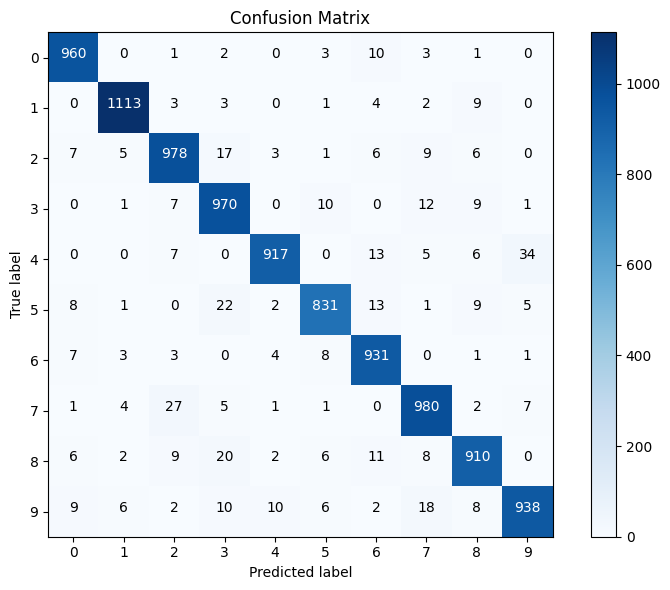

In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset using TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Stratified train-test split with 50% of training data
x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=0.5, stratify=y_train)

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten input images to 1D array
    tf.keras.layers.Dense(30, activation='relu'),   # 30 neurons in the first layer
    tf.keras.layers.Dense(20, activation='relu'),   # 20 neurons in the second layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, verbose=0)

# Evaluate the model
y_pred = np.argmax(model.predict(x_test), axis=-1)
test_loss, test_acc = model.evaluate(x_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')
print(f'F1-score: {f1}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [16]:
# Identify commonly confused digits
confused_digits = []
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 0:
            confused_digits.append((i, j, cm[i, j]))

# Sort the confused digits by the frequency of confusion
confused_digits.sort(key=lambda x: x[2], reverse=True)

# Print the commonly confused digits
print("Commonly confused digits:")
for digit1, digit2, count in confused_digits:
    print(f"Digits {digit1} and {digit2}: Confusion count = {count}")


Commonly confused digits:
Digits 4 and 9: Confusion count = 34
Digits 7 and 2: Confusion count = 27
Digits 5 and 3: Confusion count = 22
Digits 8 and 3: Confusion count = 20
Digits 9 and 7: Confusion count = 18
Digits 2 and 3: Confusion count = 17
Digits 4 and 6: Confusion count = 13
Digits 5 and 6: Confusion count = 13
Digits 3 and 7: Confusion count = 12
Digits 8 and 6: Confusion count = 11
Digits 0 and 6: Confusion count = 10
Digits 3 and 5: Confusion count = 10
Digits 9 and 3: Confusion count = 10
Digits 9 and 4: Confusion count = 10
Digits 1 and 8: Confusion count = 9
Digits 2 and 7: Confusion count = 9
Digits 3 and 8: Confusion count = 9
Digits 5 and 8: Confusion count = 9
Digits 8 and 2: Confusion count = 9
Digits 9 and 0: Confusion count = 9
Digits 5 and 0: Confusion count = 8
Digits 6 and 5: Confusion count = 8
Digits 8 and 7: Confusion count = 8
Digits 9 and 8: Confusion count = 8
Digits 2 and 0: Confusion count = 7
Digits 3 and 2: Confusion count = 7
Digits 4 and 2: Confusio

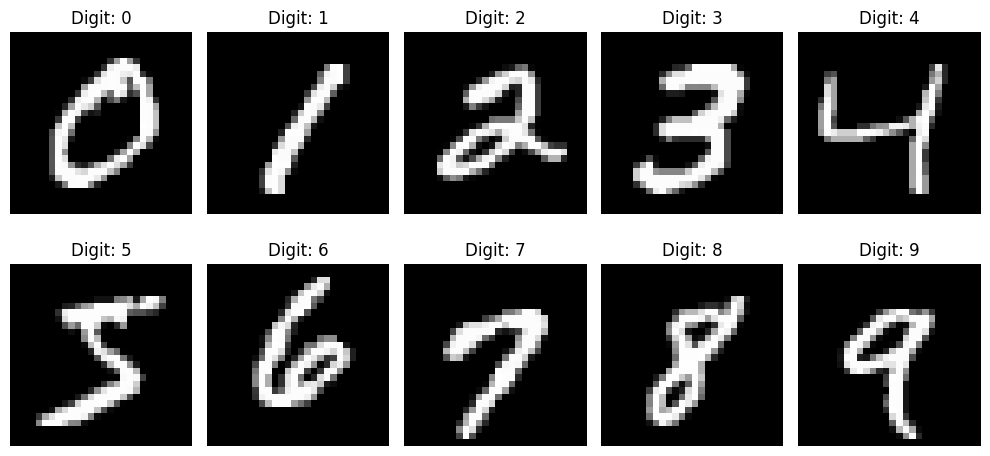

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset using TensorFlow
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Plot one example of each digit
unique_digits = np.unique(y_train)
plt.figure(figsize=(10, 5))
for i, digit in enumerate(unique_digits):
    # Find the index of the first occurrence of the digit in the training set
    index = np.where(y_train == digit)[0][0]
    # Plot the digit
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f'Digit: {digit}')
    plt.axis('off')
plt.tight_layout()
plt.show()


313/313 [==============================] - 1s 2ms/step


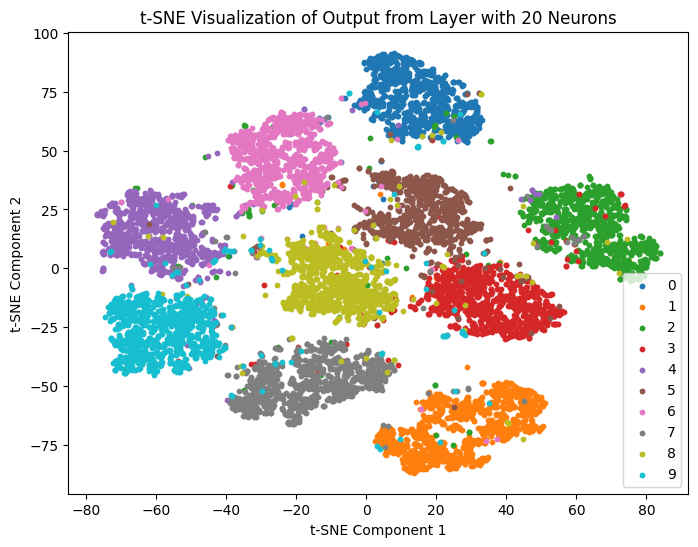

In [9]:
from sklearn.manifold import TSNE
# Extract activations from the layer containing 20 neurons
layer20_model = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
activations = layer20_model.predict(x_test)

# Apply t-SNE to reduce the dimensionality of the activations to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_output = tsne.fit_transform(activations)

# Plot t-SNE embeddings for each digit
plt.figure(figsize=(8, 6))
for i in range(10):
    indices = (y_test == i)
    plt.scatter(tsne_output[indices, 0], tsne_output[indices, 1], label=str(i), s=10)
plt.title('t-SNE Visualization of Output from Layer with 20 Neurons')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

313/313 [==============================] - 2s 6ms/step


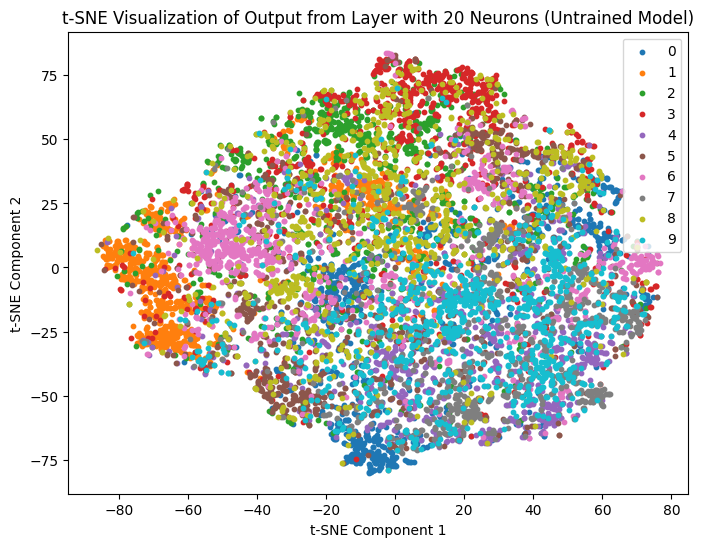

In [10]:
# Define the MLP model
untrained_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten input images to 1D array
    tf.keras.layers.Dense(30, activation='relu'),   # 30 neurons in the first layer
    tf.keras.layers.Dense(20, activation='relu'),   # 20 neurons in the second layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Extract activations from the layer containing 20 neurons in the untrained model
layer20_untrained_model = tf.keras.Model(inputs=untrained_model.input, outputs=untrained_model.layers[2].output)
activations_untrained = layer20_untrained_model.predict(x_test)

# Apply t-SNE to reduce the dimensionality of the activations to 2D for the untrained model
tsne_untrained = TSNE(n_components=2, random_state=42)
tsne_output_untrained = tsne_untrained.fit_transform(activations_untrained)

# Plot t-SNE embeddings for the untrained model
plt.figure(figsize=(8, 6))
for i in range(10):
    indices = (y_test == i)
    plt.scatter(tsne_output_untrained[indices, 0], tsne_output_untrained[indices, 1], label=str(i), s=10)
plt.title('t-SNE Visualization of Output from Layer with 20 Neurons (Untrained Model)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

4422102/4422102 [==============================] - 1s 0us/step


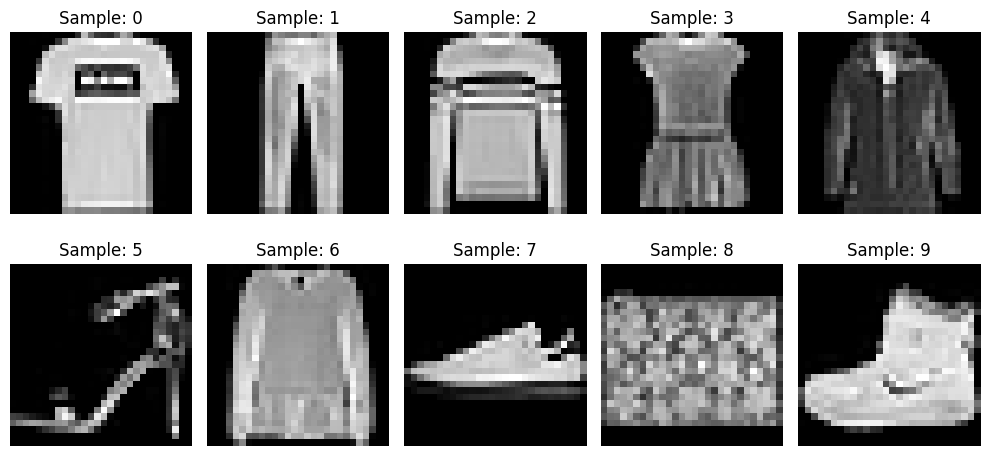

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset using TensorFlow
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Plot one example of each digit
unique_samples = np.unique(y_train)
plt.figure(figsize=(10, 5))
for i, sample in enumerate(unique_samples):
    # Find the index of the first occurrence of the digit in the training set
    index = np.where(y_train == sample)[0][0]
    # Plot the digit
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f'Sample: {sample}')
    plt.axis('off')
plt.tight_layout()
plt.show()


313/313 [==============================] - 0s 1ms/step


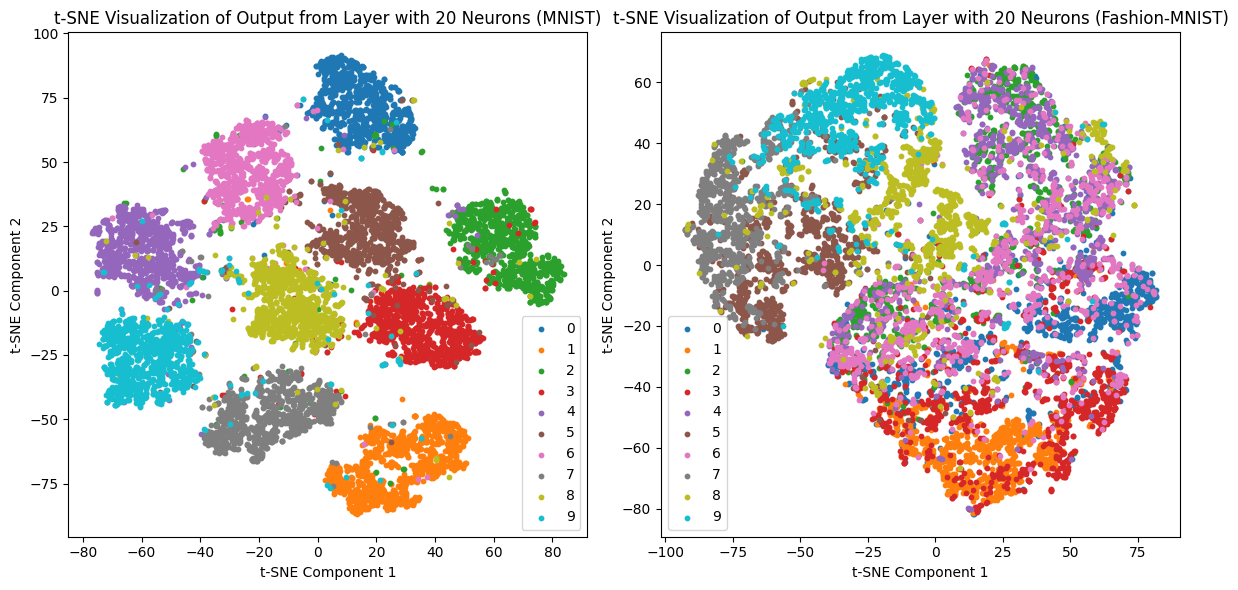

In [13]:

# Load Fashion-MNIST dataset using TensorFlow
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the Fashion-MNIST data
x_train_fashion, x_test_fashion = x_train_fashion / 255.0, x_test_fashion / 255.0

# Use the trained MLP model to predict on Fashion-MNIST test set
activations_fashion = layer20_model.predict(x_test_fashion)

# Apply t-SNE to reduce the dimensionality of activations to 2D for Fashion-MNIST
tsne_output_fashion = tsne.fit_transform(activations_fashion)

# Plot t-SNE embeddings for both MNIST and Fashion-MNIST
plt.figure(figsize=(12, 6))

# Plot t-SNE embeddings for MNIST
plt.subplot(1, 2, 1)
for i in range(10):
    indices = (y_test == i)
    plt.scatter(tsne_output[indices, 0], tsne_output[indices, 1], label=str(i), s=10)
plt.title('t-SNE Visualization of Output from Layer with 20 Neurons (MNIST)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

# Plot t-SNE embeddings for Fashion-MNIST
plt.subplot(1, 2, 2)
for i in range(10):
    indices = (y_test_fashion == i)
    plt.scatter(tsne_output_fashion[indices, 0], tsne_output_fashion[indices, 1], label=str(i), s=10)
plt.title('t-SNE Visualization of Output from Layer with 20 Neurons (Fashion-MNIST)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()
